In [1]:
# This is a python block

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

# cargo los datos

In [4]:
df = pd.read_csv('./dataset_clean.csv', index_col=[0])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5263 entries, 0 to 5328
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lowest distortion                5263 non-null   int64  
 1   A                                5263 non-null   int64  
 2   B                                5263 non-null   int64  
 3   Radius A [ang]                   5263 non-null   float64
 4   Radius B [ang]                   5263 non-null   float64
 5   Formation energy [eV/atom]       5263 non-null   float64
 6   Stability [eV/atom]              5263 non-null   float64
 7   Volume per atom [A^3/atom]       5263 non-null   float64
 8   Band gap [eV]                    5263 non-null   float64
 9   a [ang]                          5263 non-null   float64
 10  Vacancy energy [eV/O atom]       4914 non-null   float64
 11  Stability (log[eV/atom])         4981 non-null   float64
 12  Vacancy energy (log[

In [6]:
df.drop(columns = ["a [ang]"], axis=[1], inplace = True)


verifico

In [7]:
df.columns

Index(['Lowest distortion', 'A', 'B', 'Radius A [ang]', 'Radius B [ang]',
       'Formation energy [eV/atom]', 'Stability [eV/atom]',
       'Volume per atom [A^3/atom]', 'Band gap [eV]',
       'Vacancy energy [eV/O atom]', 'Stability (log[eV/atom])',
       'Vacancy energy (log[eV/O atom])', 'Magnetic moment (^2[mu_B])',
       'Valence B_1', 'Valence B_2', 'Valence B_3', 'Valence B_4',
       'Valence B_5', 'Valence B_element not in BV', 'Valence B_not balanced'],
      dtype='object')

# Preprocesamiento rápido

- Resuelvo problemas con descriptores que tienen infinitos

In [8]:
filter = df['Vacancy energy (log[eV/O atom])'] == -np.inf
df['Vacancy energy (log[eV/O atom])'][filter] = np.nan

/tmp/ipykernel_400/1774103811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vacancy energy (log[eV/O atom])'][filter] = np.nan


In [9]:
filter = df['Stability (log[eV/atom])'] == -np.inf
df['Stability (log[eV/atom])'][filter] = np.nan

/tmp/ipykernel_400/4054084434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stability (log[eV/atom])'][filter] = np.nan


- Elimino nulos 

In [10]:
df.isnull().sum()

Lowest distortion                     0
A                                     0
B                                     0
Radius A [ang]                        0
Radius B [ang]                        0
Formation energy [eV/atom]            0
Stability [eV/atom]                   0
Volume per atom [A^3/atom]            0
Band gap [eV]                         0
Vacancy energy [eV/O atom]          349
Stability (log[eV/atom])            290
Vacancy energy (log[eV/O atom])    3169
Magnetic moment (^2[mu_B])          947
Valence B_1                           0
Valence B_2                           0
Valence B_3                           0
Valence B_4                           0
Valence B_5                           0
Valence B_element not in BV           0
Valence B_not balanced                0
dtype: int64

In [11]:
df.drop('Vacancy energy (log[eV/O atom])', axis=1, inplace= True)

df.dropna(inplace=True)

# Split target y patrón 

In [12]:
# atributos
x = df.drop('Lowest distortion', axis=1)
# variable obejtivo:
y = df['Lowest distortion']

- Validación

In [13]:
print(x.shape)
print(y.shape)


(3720, 18)
(3720,)


- Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle = True)

In [15]:
print(X_train.shape)
print(X_test.shape)

(2976, 18)
(744, 18)


# Escalamiento/Normalización de los datos 

In [16]:
x_st_scaler = StandardScaler() #Creo instancia del scaler
y_st_scaler = StandardScaler() #Creo instancia del scaler


In [17]:
X_train = x_st_scaler.fit_transform(X_train) # escalo train
X_test = x_st_scaler.transform(X_test) #transformo test

In [38]:
X_test.shape

(744, 18)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3720 entries, 0 to 5328
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lowest distortion            3720 non-null   int64  
 1   A                            3720 non-null   int64  
 2   B                            3720 non-null   int64  
 3   Radius A [ang]               3720 non-null   float64
 4   Radius B [ang]               3720 non-null   float64
 5   Formation energy [eV/atom]   3720 non-null   float64
 6   Stability [eV/atom]          3720 non-null   float64
 7   Volume per atom [A^3/atom]   3720 non-null   float64
 8   Band gap [eV]                3720 non-null   float64
 9   Vacancy energy [eV/O atom]   3720 non-null   float64
 10  Stability (log[eV/atom])     3720 non-null   float64
 11  Magnetic moment (^2[mu_B])   3720 non-null   float64
 12  Valence B_1                  3720 non-null   int64  
 13  Valence B_2       

# Entrenamiento del modelo con Knn-vecinos

In [19]:
from sklearn.neighbors import KNeighborsClassifier

- Instancia modelo

In [20]:
model = KNeighborsClassifier(n_neighbors=10)

- Entreno

In [21]:
model=model.fit(X_train, y_train)
model

KNeighborsClassifier(n_neighbors=10)

- Predigo

In [22]:
y_pred = model.predict(X_test)

In [23]:
rl_predictions =model.predict(X_test)

In [24]:
np.unique(y)

array([0, 1, 2, 3])

In [25]:
print(np.array(y_test))
print(np.array(rl_predictions))

[0 2 2 0 0 0 0 0 1 0 0 1 1 0 0 0 0 2 0 0 1 0 0 0 1 0 2 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 2 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 1 0 2 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1
 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 2 1 0 1 0 0 1 0 1 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 2
 0 0 0 0 1 0 1 0 3 0 2 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1
 1 0 0 0 0 0 1 1 1 2 1 0 0 1 0 0 0 0 0 0 0 3 1 2 0 0 2 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 2 0 0 0 1 1 2 1 0 0 3 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 2 2 0 0 0 2 0 0 0 0 1 0 0 0 1 0 0 0 2 0 1 0 0 0 0 1 2
 0 2 0 1 0 0 1 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 2 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 2 2 1 1 1 0 0 3 0 3 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 1 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 2 0 0
 1 0 1 1 1 1 2 2 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 1 0 1 0 0 0 1 0 1 0 0 2 

# Evaluación 

1. COEFICIENTE DE CORRELACIÓN DE MATTHEWS

In [26]:
from sklearn.metrics import matthews_corrcoef


In [27]:
coeficiente_mcc = matthews_corrcoef(y_test, y_pred)
coeficiente_mcc

0.7803191599304513

2. score: para ver la metrica del desempeño

In [28]:
model.score(X_test,y_test)

0.8991935483870968

3. 

In [29]:
neig =range(1,10) 
test_accuracy=[]


In [30]:
for k in neig:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train) #entreno
  test_accuracy.append(knn.score(X_test,y_test)) 


In [31]:
print("Clouster -> Accuracy")
print(test_accuracy)

Clouster -> Accuracy
[0.8924731182795699, 0.896505376344086, 0.8924731182795699, 0.8924731182795699, 0.9045698924731183, 0.8951612903225806, 0.8951612903225806, 0.8978494623655914, 0.9018817204301075]


Text(0, 0.5, '')

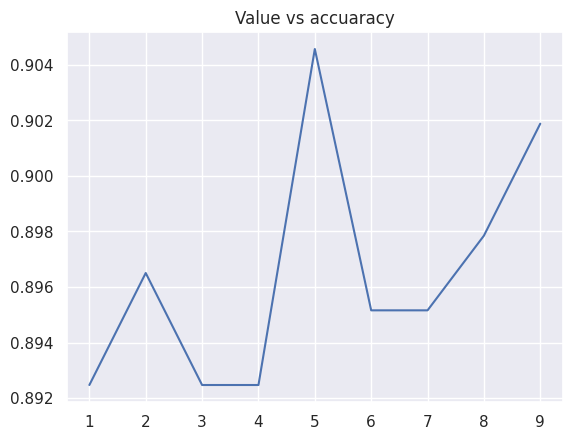

In [32]:
plt.plot(neig, test_accuracy, label='training Acuaracy')
plt.title('Value vs accuaracy')
plt.xlabel('')
plt.ylabel('')

REOPORTE DE LA CLASIFICACIÓN

In [33]:
print("Best accuracy is{} with k={} ". format(max(test_accuracy), 1+test_accuracy.index(max(test_accuracy))))

Best accuracy is0.9045698924731183 with k=5 


In [34]:
from sklearn import metrics
from sklearn.metrics import (
    recall_score,
    confusion_matrix,
    precision_score,
    f1_score,
    classification_report,
)

In [35]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       505
           1       0.81      0.88      0.84       189
           2       0.70      0.17      0.27        41
           3       0.43      0.33      0.38         9

    accuracy                           0.90       744
   macro avg       0.72      0.59      0.61       744
weighted avg       0.89      0.90      0.89       744



In [36]:
# target
categoricalTarget = ['cubic', 'orthorhombic', 'rhombohedral', 'tetragonal']
numericalTarget = list(range(0,4))
numericalTarget

y_test.replace(numericalTarget,categoricalTarget, inplace = True)
y_pred = pd.Series(y_pred)
y_pred.replace(numericalTarget,categoricalTarget, inplace = True)

MATRIZ DE CONFUSIÓN

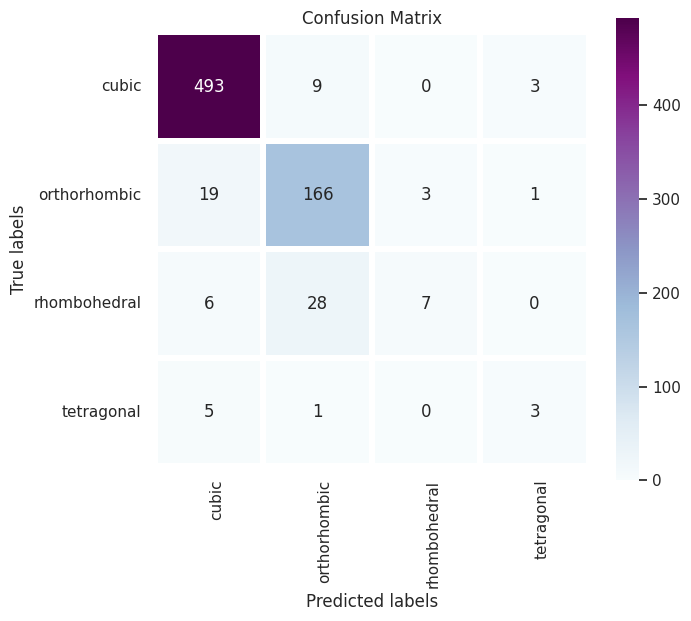

In [37]:
import seaborn as sns
f, ax= plt.subplots()

sns.heatmap(
    confusion_matrix(list(y_test), list(y_pred)), annot=True, fmt="d",square=True, cmap='BuPu', linewidths=3,  ax=ax
)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(categoricalTarget)
ax.yaxis.set_ticklabels(categoricalTarget);

plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=00, ha="right",
         rotation_mode="anchor")

f.set_figheight(6)
f.set_figwidth(7)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a7ebb3ed-5c94-423a-a3b7-e9cd0209ff98' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>